# **Prog. para Análise de Dados (IBM8910)**

## **AP2 (Questões com solução)**

## **DATA DE ENTREGA: 18/06/2024, até as 23h59min.**

# **Instruções**
- A avaliação deve ser resolvida em grupos de até QUATRO integrantes.
- Toda a avaliação deve ser documentada e executada em um Colab Notebook único, que será compartilhado com o professor e com os demais integrantes do grupo na entrega da avaliação.
- Os integrantes devem fazer uma cópia deste notebook para seu próprio Google Drive e executar a avaliação nesta cópia própria. Caso queiram, apenas um dos integrantes do grupo pode fazer a cópia.
- Os nomes dos integrantes, com a matrícula entre parênteses, devem ser preenchidos na célula dedicada no início do Colab Notebook.
- Ao terminar a execução das tarefas, apenas um dos integrantes do grupo deverá compartilhá-lo, por e-mail, com os demais integrantes do grupo e o professor (**cassius.figueiredo@professores.ibmec.edu.br**) até a data e horário final no cabeçalho acima (vale a data e o horário do e-mail). No caso de não-compartilhamento, compartilhamento incorreto, falta da entrega ou entrega atrasada, esta será desconsiderada e a nota ZERO será dada a todos os integrantes grupo. **Atenção ao compartilhamento para que ele não fique como “Restrito”!**
- Esta avaliação vale 40% da nota final e pontuação de cada questão estará indicada.
- Todas as questões devem ser feitas utilizando apenas a linguagem Python.

# **INTEGRANTE(S)**

ALUNO(A) 1: Thiago Corrê Brandão

## **QUESTÃO 01 (1,0 Pontos)**

Carregue para um dataframe a base que está em https://raw.githubusercontent.com/cassiusf/datasets/main/petr_vale.csv, diretamente do Github. Após carregar os dados, Apresente as duas séries de dados em uma visualização única. Garanta que sua visualização contenha a legenda identificando os dados.

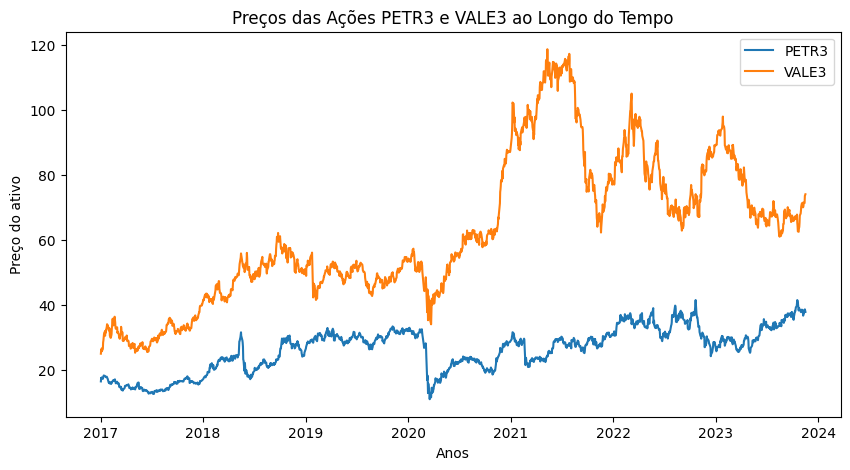

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/cassiusf/datasets/main/petr_vale.csv'
df = pd.read_csv(url)
plt.figure(figsize=(10,5))
plt.plot(pd.to_datetime(df['Date']), df['PETR3'], label = 'PETR3' )
plt.plot(pd.to_datetime(df['Date']), df['VALE3'], label = 'VALE3')
plt.xlabel('Anos')
plt.ylabel('Preço do ativo')
plt.title('Preços das Ações PETR3 e VALE3 ao Longo do Tempo')
plt.legend()
plt.show()

## **QUESTÃO 02 (1,0 Pontos)**

Apresente em uma nova visualização única a série original de dados do ativo PETR3, juntamente com as visualizações das aplicações de médias móveis simples com janelas de 15, 50 e 100 dias. Garanta que sua visualização contenha a legenda identificando os dados.

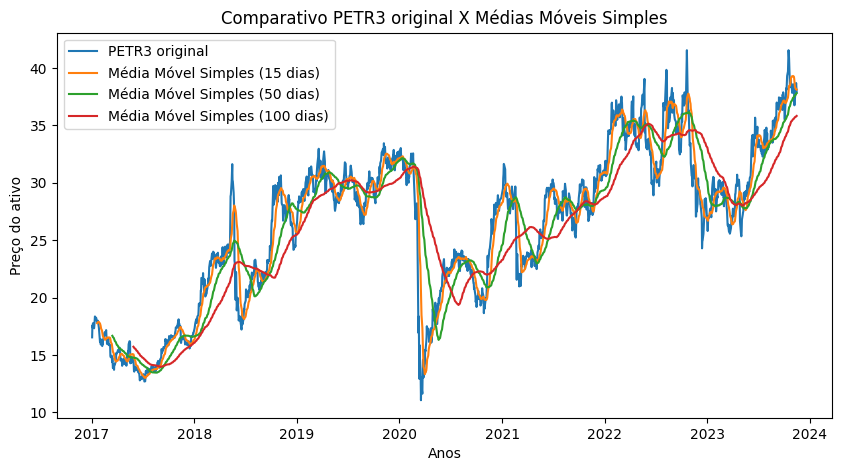

In [19]:
def calcula_media_movel(serie, janela):
    serie = serie.copy()
    serie = serie.astype(float)
    serie = pd.Series(serie)
    return serie.rolling(window=janela).mean()

media_15 = calcula_media_movel(df['PETR3'], 15)
media_50 = calcula_media_movel(df['PETR3'], 50)
media_100 = calcula_media_movel(df['PETR3'], 100)

plt.figure(figsize=(10,5))
plt.plot(pd.to_datetime(df['Date']), df['PETR3'], label = 'PETR3 original')
plt.plot(pd.to_datetime(df['Date']),media_15, label='Média Móvel Simples (15 dias)')
plt.plot(pd.to_datetime(df['Date']),media_50, label='Média Móvel Simples (50 dias)')
plt.plot(pd.to_datetime(df['Date']),media_100, label='Média Móvel Simples (100 dias)')
plt.xlabel('Anos')
plt.ylabel('Preço do ativo')
plt.title('Comparativo PETR3 original X Médias Móveis Simples')
plt.legend()

## **QUESTÃO 03 (1,0 Pontos)**

Apresente em uma nova visualização única a série original de dados do ativo VALE3, juntamente com a visualização da aplicação de média móvel exponencial com janela de 200 dias. Garanta que sua visualização contenha a legenda identificando os dados.

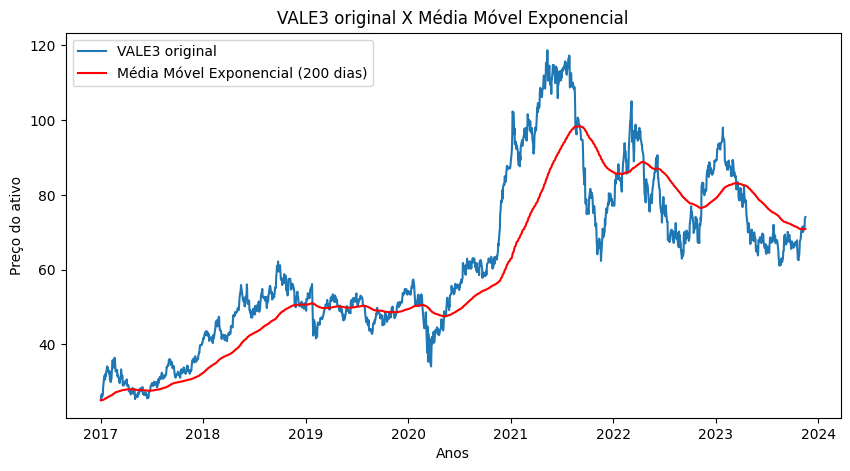

In [20]:
def calcula_media_movel_exponencial(serie, janela):
    serie = serie.copy()
    serie = serie.astype(float)
    return serie.ewm(span=janela, adjust=False).mean()

ema_200 = calcula_media_movel_exponencial(df['VALE3'], 200)

plt.figure(figsize=(10,5))
plt.plot(pd.to_datetime(df['Date']), df['VALE3'], label='VALE3 original')
plt.plot(pd.to_datetime(df['Date']), ema_200, label='Média Móvel Exponencial (200 dias)', color='red')
plt.xlabel('Anos')
plt.ylabel('Preço do ativo')
plt.legend()
plt.title('VALE3 original X Média Móvel Exponencial')
plt.show()

## **QUESTÃO 04 (1,0 Pontos)**

A partir da visualização gerada na questão 2, você poderia identificar algum padrão de comportamento entre os cruzamentos das médias de 10 e 50 dias e o comportamento real do preço da ação? Justifique sua resposta.

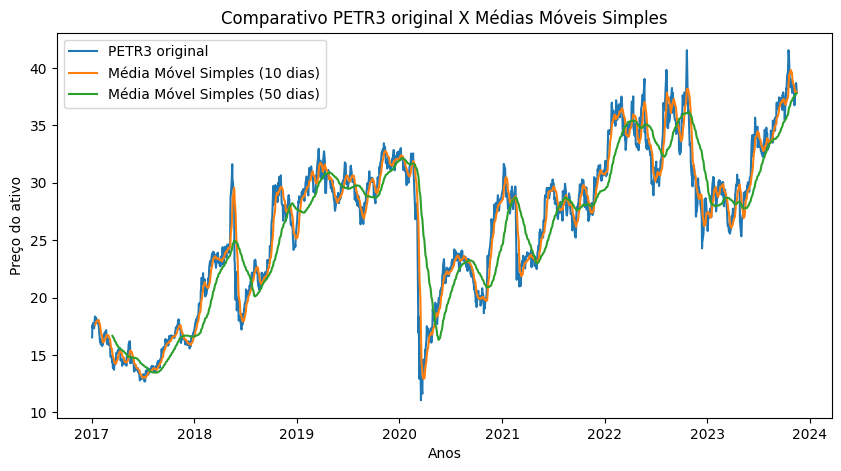

In [21]:
def calcula_media_movel(serie, janela):
    serie = serie.copy()
    serie = serie.astype(float)
    serie = pd.Series(serie)
    return serie.rolling(window=janela).mean()

media_10 = calcula_media_movel(df['PETR3'], 10)
media_50 = calcula_media_movel(df['PETR3'], 50)

plt.figure(figsize=(10,5))
plt.plot(pd.to_datetime(df['Date']), df['PETR3'], label = 'PETR3 original')
plt.plot(pd.to_datetime(df['Date']),media_10, label='Média Móvel Simples (10 dias)')
plt.plot(pd.to_datetime(df['Date']),media_50, label='Média Móvel Simples (50 dias)')
plt.xlabel('Anos')
plt.ylabel('Preço do ativo')
plt.title('Comparativo PETR3 original X Médias Móveis Simples')
plt.legend(loc='upper left')

## **QUESTÃO 05 (1,5 Pontos)**

Investigue como carregar bases SQLite em linguagem Python e utilize o conhecimento adquirido para carregar a base que está no link https://raw.githubusercontent.com/cassiusf/datasets/main/mpg.db. Faça o download da base do Github, suba-a para o Colab, carregue-a, identifique quantas tabelas temos na base SQLite e armazene cada uma destas tabelas em um dataframe próprio.

In [22]:
import sqlite3
import pandas as pd

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('/content/mpg.db')  # Substitua '/path/to/' pelo caminho correto após o upload do arquivo

# Função para listar todas as tabelas no banco de dados
def listar_tabelas(conexao):
    cursor = conexao.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tabelas = cursor.fetchall()
    cursor.close()
    return [t[0] for t in tabelas]

# Listar todas as tabelas no banco de dados
tabelas = listar_tabelas(conn)
print(f"Tabelas no banco de dados: {tabelas}")

# Carregar cada tabela em um dataframe próprio
dataframes = {}
for tabela in tabelas:
    dataframes[tabela] = pd.read_sql_query(f"SELECT * FROM {tabela}", conn)

# Fechar a conexão
conn.close()

# Exibir os dataframes
for nome_tabela, df in dataframes.items():
    print(f"\nTabela: {nome_tabela}")
    display(df.head())


Tabelas no banco de dados: ['Observation', 'Origin', 'Name']

Tabela: Observation


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_id,name_id
0,18.0,8,307.0,130.0,3504,12.0,70,2,49
1,15.0,8,350.0,165.0,3693,11.5,70,2,36
2,18.0,8,318.0,150.0,3436,11.0,70,2,231
3,16.0,8,304.0,150.0,3433,12.0,70,2,14
4,17.0,8,302.0,140.0,3449,10.5,70,2,161



Tabela: Origin


,origin_id,origin
0,0,europe
1,1,japan
2,2,usa



Tabela: Name


,name_id,name
0,0,amc ambassador brougham
1,1,amc ambassador dpl
2,2,amc ambassador sst
3,3,amc concord
4,4,amc concord d/l


## **QUESTÃO 06 (0,5 Pontos)**

A partir do carregamento da base mpg.db, feito na questão 05, agregue todos os dataframes gerados em um dataframe único. Elimine desta base agregada as variáveis `name_id` e `origin_id`, apresente o consumo médio (`mpg`), por país de origem e responda à seguinte pergunta: qual é o país e o consumo dos carros que consomem menos combustível?

In [23]:
# Dataframes carregados
df_observation = dataframes['Observation']
df_origin = dataframes['Origin']
df_name = dataframes['Name']

# Juntar a tabela Observation com a tabela Origin usando a coluna correta
df_merged = df_observation.merge(df_origin, left_on='origin_id', right_on='origin_id', suffixes=('', '_origin'))
df_merged = df_merged.merge(df_name, left_on='name_id', right_on='name_id', suffixes=('', '_name'))

# Excluir as colunas desnecessárias
df_merged = df_merged.drop(['origin_id', 'name_id'], axis=1)
display(df_merged.head())
consumo_medio_por_pais = df_merged.groupby('origin')['mpg'].mean().reset_index()
print("Consumo médio por país:")
display(consumo_medio_por_pais)
minimum_consumption_country = consumo_medio_por_pais[consumo_medio_por_pais['mpg'] == consumo_medio_por_pais['mpg'].max()]
print("País que consome menos combustível:")
display(minimum_consumption_country)
df_sorted = df_merged.sort_values(by='mpg', ascending=False)
print("Carros que consomem menos combustível:")
display(df_sorted)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,17.0,6,250.0,100.0,3329,15.5,71,usa,chevrolet chevelle malibu
2,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
3,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
4,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst


Consumo médio por país:


,origin,mpg
0,europe,27.891429
1,japan,30.450633
2,usa,20.083534


País que consome menos combustível:


,origin,mpg
1,japan,30.450633


Carros que consomem menos combustível:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
307,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
308,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
385,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
397,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
386,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
...,...,...,...,...,...,...,...,...,...
76,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis
12,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
42,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
41,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250


## **QUESTÃO 07 (1,0 Pontos)**

A partir da base da questão 06, apresente a mediana de potência (`horsepower`), aceleração (`acceleration`), consumo (`mpg`) e peso (`weight`) dos carros, por  país de origem (`origin`) e quantidade de cilindros (`cylinders`).

In [24]:
mediana_potencia_por_pais_cilindros = df_merged.groupby(['origin', 'cylinders'])[['horsepower', 'acceleration', 'mpg', 'weight']].median().reset_index()
print("Mediana de Potência, Aceleração, Consumo e Peso por País e Cilindros:")
display(mediana_potencia_por_pais_cilindros)

Mediana de Potência, Aceleração, Consumo e Peso por País e Cilindros:


,origin,cylinders,horsepower,acceleration,mpg,weight
0,europe,4,76.0,15.50,27.00,2219.0
1,europe,5,77.0,19.90,25.40,2950.0
2,europe,6,122.5,16.25,16.75,3285.0
3,japan,3,98.5,13.50,20.25,2375.0
4,japan,4,70.0,16.50,32.00,2130.0
5,japan,6,118.0,13.65,23.10,2905.0
6,usa,4,84.0,16.30,27.00,2408.0
7,usa,6,100.0,16.45,19.00,3239.0
8,usa,8,150.0,13.00,14.00,4140.0


## **QUESTÃO 8 (1,0 Pontos)**

Carregue o arquivo em formato JSON a partir do link https://data.nasa.gov/resource/y77d-th95.json para um dataframe Apresente seu conteúdo no Colab.

In [25]:
import requests
import pandas as pd

# URL do arquivo JSON
url = 'https://data.nasa.gov/resource/y77d-th95.json'

# Fazer o download do arquivo JSON
response = requests.get(url)
data = response.json()

# Carregar o JSON em um dataframe
df = pd.json_normalize(data)

# Mostrar o conteúdo do dataframe
df.head(10)


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.type,geolocation.coordinates,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,Point,"[6.08333, 50.775]",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,Point,"[10.23333, 56.18333]",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,Point,"[-113, 54.21667]",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,Point,"[-99.9, 16.88333]",NaN,NaN
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,Point,"[-64.95, -33.16667]",NaN,NaN
5,Adhi Kot,379,Valid,EH4,4239,Fell,1919-01-01T00:00:00.000,32.100000,71.800000,Point,"[71.8, 32.1]",NaN,NaN
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910,Fell,1949-01-01T00:00:00.000,44.833330,95.166670,Point,"[95.16667, 44.83333]",NaN,NaN
7,Agen,392,Valid,H5,30000,Fell,1814-01-01T00:00:00.000,44.216670,0.616670,Point,"[0.61667, 44.21667]",NaN,NaN
8,Aguada,398,Valid,L6,1620,Fell,1930-01-01T00:00:00.000,-31.600000,-65.233330,Point,"[-65.23333, -31.6]",NaN,NaN
9,Aguila Blanca,417,Valid,L,1440,Fell,1920-01-01T00:00:00.000,-30.866670,-64.550000,Point,"[-64.55, -30.86667]",NaN,NaN


## **QUESTÃO 9 (1,0 Pontos)**

A partir da base carregada na questão 8, apresente a quantidade de classes únicas da base (variável "recclass") e a média da variável "mass" para cada uma das classes da variável "fall".

In [26]:
unique_classes_recclass = df['recclass'].nunique()
print(f"Quantidade de classes únicas na variável 'recclass': {unique_classes_recclass}")
# Calcular a média da variável "mass" para cada classe da variável "fall"
# Primeiramente, converter a coluna "mass" para numérica, se necessário
df['mass'] = pd.to_numeric(df['mass'], errors='coerce')

# Agrupar por "fall" e calcular a média da "mass"
mass_mean_by_fall = df.groupby('fall')['mass'].mean().reset_index()

# Mostrar o resultado
print("Média da variável 'mass' para cada classe da variável 'fall':")
print(mass_mean_by_fall)

Quantidade de classes únicas na variável 'recclass': 118
Média da variável 'mass' para cada classe da variável 'fall':
    fall          mass
0   Fell  50396.945671
1  Found    156.700000


## **QUESTÃO 10 (1,0 Pontos)**

Carregue para um dataframe a base que está em https://raw.githubusercontent.com/cassiusf/datasets/main/diamonds.xlsx , diretamente do Github. Armazene seu conteúdo em um dataframe e a partir dele apresente em uma visualização única as correlaçãoes entre todas as variáveis numéricas contínuas da base. Utilize a visualização criada para indicar quais são os pares de variáveis com maior correlação positiva e negativa.

Primeiras linhas do dataframe:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


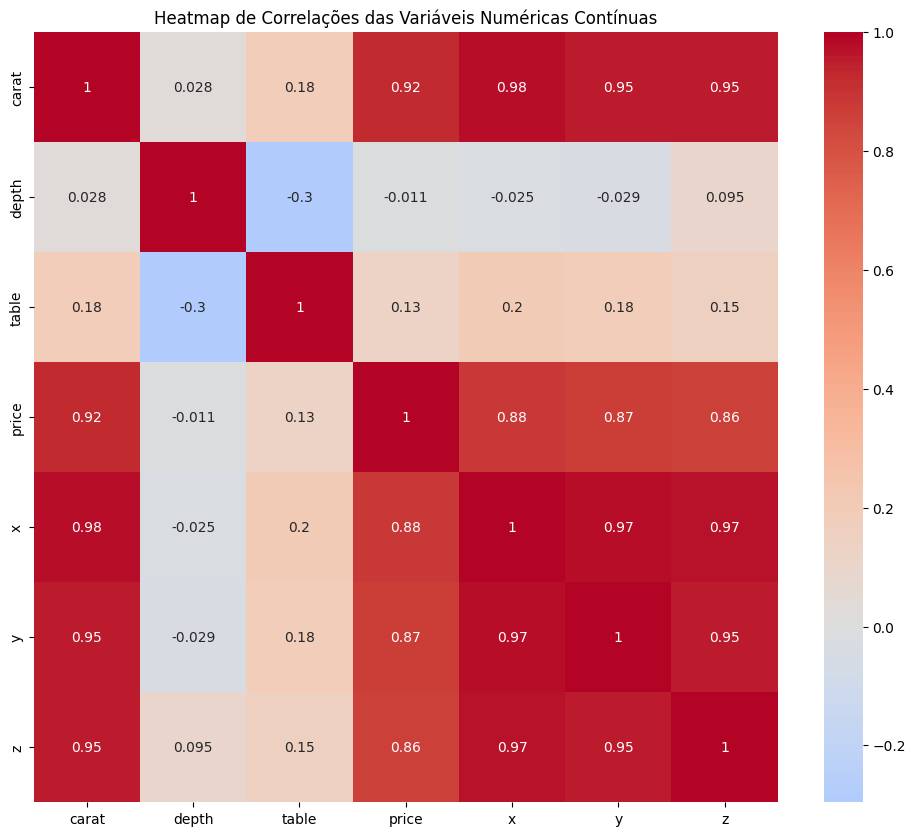

Maior correlação positiva: x  carat    0.975094
dtype: float64
Maior correlação negativa: depth  table   -0.295779
dtype: float64


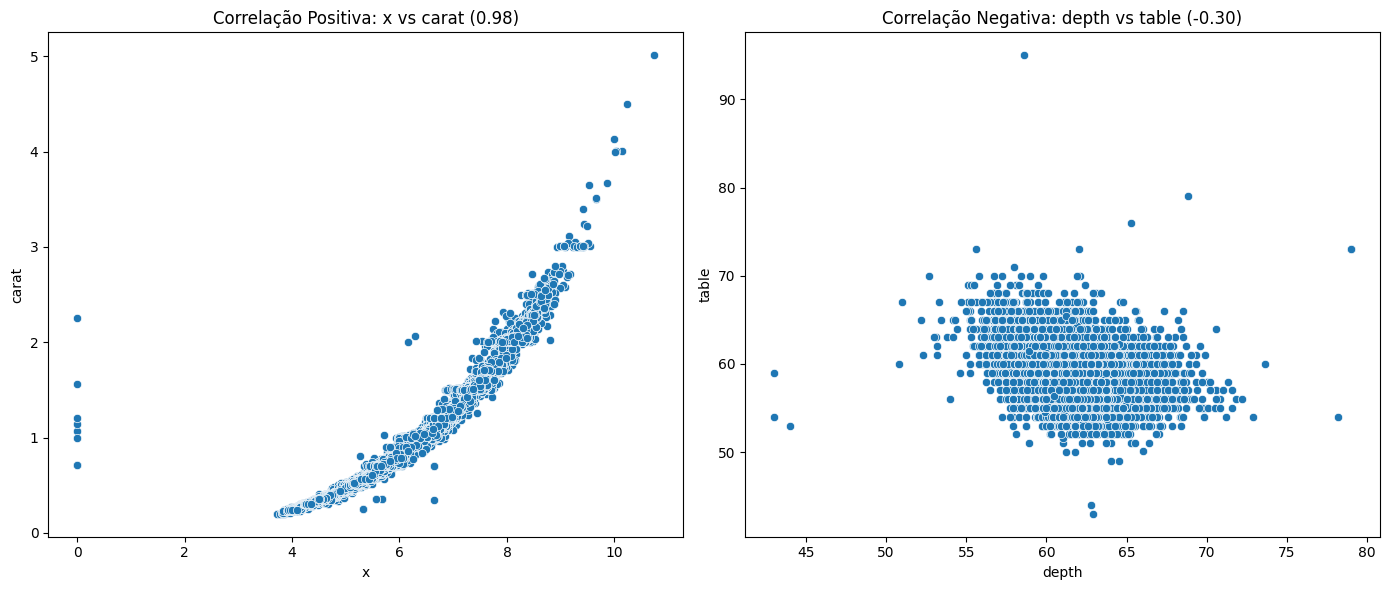

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# URL do arquivo Excel
url = 'https://raw.githubusercontent.com/cassiusf/datasets/main/diamonds.xlsx'

# Carregar o arquivo Excel diretamente do link
df = pd.read_excel(url)

# Mostrar as primeiras linhas do dataframe para inspecionar a estrutura
print("Primeiras linhas do dataframe:")
print(df.head())

# Selecionar apenas as colunas numéricas contínuas
numerical_df = df.select_dtypes(include=[np.number])

# Calcular a correlação entre as variáveis numéricas contínuas
correlation_matrix = numerical_df.corr()

# Visualizar as correlações usando um mapa de calor (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlações das Variáveis Numéricas Contínuas')
plt.show()

# Identificar os pares de variáveis com maior correlação positiva e negativa
# Obter as correlações em uma série ordenada
correlation_pairs = correlation_matrix.unstack()
# Remover as correlações de uma variável com ela mesma
correlation_pairs = correlation_pairs[correlation_pairs != 1]
# Ordenar as correlações
sorted_correlation_pairs = correlation_pairs.sort_values()

# Obter o par de variáveis com maior correlação positiva
highest_positive_correlation = sorted_correlation_pairs.tail(1)
# Obter o par de variáveis com maior correlação negativa
highest_negative_correlation = sorted_correlation_pairs.head(1)

print(f"Maior correlação positiva: {highest_positive_correlation}")
print(f"Maior correlação negativa: {highest_negative_correlation}")

# Extrair os pares de variáveis
pos_var1, pos_var2 = highest_positive_correlation.index[0]
neg_var1, neg_var2 = highest_negative_correlation.index[0]

# Plotar os gráficos de dispersão para os pares de variáveis com maior correlação positiva e negativa
plt.figure(figsize=(14, 6))

# Gráfico de dispersão para maior correlação positiva
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x=pos_var1, y=pos_var2)
plt.title(f'Correlação Positiva: {pos_var1} vs {pos_var2} ({highest_positive_correlation.values[0]:.2f})')

# Gráfico de dispersão para maior correlação negativa
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x=neg_var1, y=neg_var2)
plt.title(f'Correlação Negativa: {neg_var1} vs {neg_var2} ({highest_negative_correlation.values[0]:.2f})')

plt.tight_layout()
plt.show()
